# GARCH Stock Forecasting

## Read Data

In [4]:
#import pandas_datareader.data as web
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np

## DIS Volatility

In [5]:
start = datetime(2015, 1, 1)
end = datetime(2020, 6, 10)

In [22]:
#dis = web.DataReader('DIS', 'yahoo', start=start, end=end)

In [7]:
import yfinance as yf
import matplotlib.pyplot as plt

PG = yf.download('PG', start = '2016-01-01' , end = '2022-01-01')
PG.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,78.360001,78.500000,77.540001,78.370003,61.459175,11529800
2016-01-05,78.440002,78.959999,78.209999,78.620003,61.655224,8133700
2016-01-06,77.669998,78.290001,77.120003,77.860001,61.059208,9551000
2016-01-07,76.849998,77.599998,76.070000,77.180000,60.525940,11973900
2016-01-08,77.360001,77.480003,75.669998,75.970001,59.577045,9676400


In [8]:
#returns = 100 * dis.Close.pct_change().dropna()
returns = 100 * PG.Close.pct_change().dropna()

Text(0.5, 1.0, 'DIS Returns')

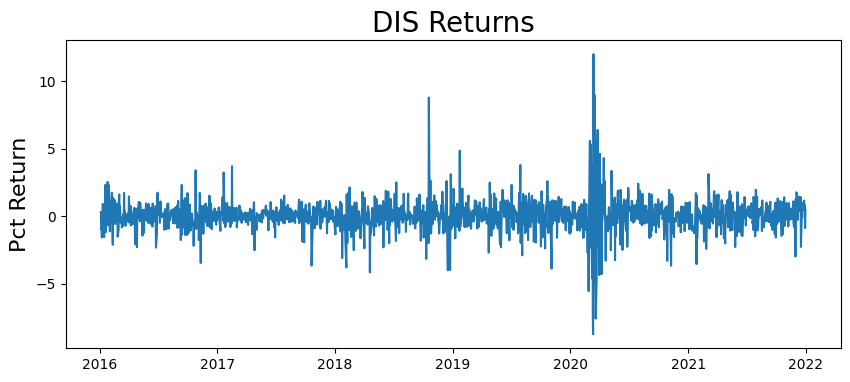

In [9]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Pct Return', fontsize=16)
plt.title('DIS Returns', fontsize=20)

## PACF

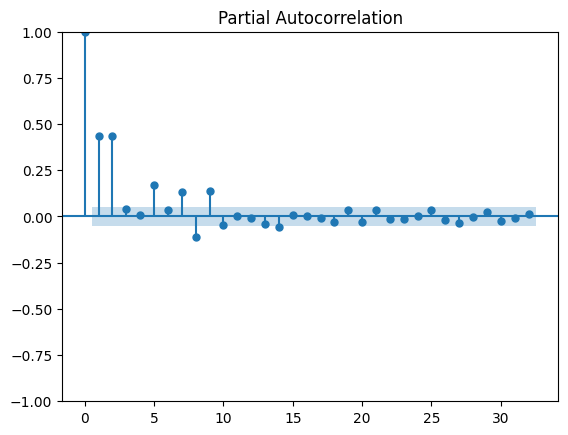

In [10]:
plot_pacf(returns**2)
plt.show()

## Fit GARCH(3,3)

In [11]:
model = arch_model(returns, p=3, q=3)

In [12]:
model_fit = model.fit()

Iteration:      1,   Func. Count:     10,   Neg. LLF: 24744282344.599037
Iteration:      2,   Func. Count:     21,   Neg. LLF: 1990602763.3105793
Iteration:      3,   Func. Count:     32,   Neg. LLF: 2631.6010477048685
Iteration:      4,   Func. Count:     42,   Neg. LLF: 5040.009276474012
Iteration:      5,   Func. Count:     53,   Neg. LLF: 2301.3861104601465
Iteration:      6,   Func. Count:     63,   Neg. LLF: 2244.844661493558
Iteration:      7,   Func. Count:     74,   Neg. LLF: 2149.370024495222
Iteration:      8,   Func. Count:     84,   Neg. LLF: 2199.904054869758
Iteration:      9,   Func. Count:     95,   Neg. LLF: 2134.2884844993077
Iteration:     10,   Func. Count:    105,   Neg. LLF: 2135.2820320261776
Iteration:     11,   Func. Count:    115,   Neg. LLF: 2133.408285945414
Iteration:     12,   Func. Count:    124,   Neg. LLF: 2133.40539327687
Iteration:     13,   Func. Count:    133,   Neg. LLF: 2133.4030187445487
Iteration:     14,   Func. Count:    142,   Neg. LLF: 2133

In [13]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2133.39
Distribution:                  Normal   AIC:                           4282.79
Method:            Maximum Likelihood   BIC:                           4325.34
                                        No. Observations:                 1510
Date:                Sun, Aug 04 2024   Df Residuals:                     1509
Time:                        20:08:58   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0602  2.534e-02      2.377  1.744e-02 [1.058e-02,  0.110]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.1788      0.241      0.741      0.459    [ -0.294,  0.652]
alpha[1]       0.1621      0.132      1.227      0.220 [-9.681e-02,  0.421]
alpha[2]       0.1156      0.226      0.511      0.610    [ -0.328,  0.559]
alpha[3]       0.0485      0.259      0.187      0.852    [ -0.460,  0.557]
beta[1]        0.2480      1.127      0.220      0.826    [ -1.961,  2.457]
beta[2]        0.0000      0.346      0.000      1.000    [ -0.677,  0.677]
beta[3]        0.2885      0.476      0.606      0.545    [ -0.645,  1.222]
===========================================================================

Covariance estimator: robust
"""

## Try GARCH(3,0) = ARCH(3)

In [14]:
model = arch_model(returns, p=3, q=0)

In [15]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 4596.571769375585
Iteration:      2,   Func. Count:     16,   Neg. LLF: 6095.940673912675
Iteration:      3,   Func. Count:     25,   Neg. LLF: 786649.5153443741
Iteration:      4,   Func. Count:     32,   Neg. LLF: 566031.073435006
Iteration:      5,   Func. Count:     39,   Neg. LLF: 36267.16934942218
Iteration:      6,   Func. Count:     46,   Neg. LLF: 2650.017034272325
Iteration:      7,   Func. Count:     54,   Neg. LLF: 2160.5919157825
Iteration:      8,   Func. Count:     61,   Neg. LLF: 2152.4147797267137
Iteration:      9,   Func. Count:     67,   Neg. LLF: 2151.8345113211517
Iteration:     10,   Func. Count:     73,   Neg. LLF: 2151.7448127412845
Iteration:     11,   Func. Count:     79,   Neg. LLF: 2151.7403080365443
Iteration:     12,   Func. Count:     85,   Neg. LLF: 2151.740203007097
Iteration:     13,   Func. Count:     91,   Neg. LLF: 2151.740200680918
Iteration:     14,   Func. Count:     96,   Neg. LLF: 2151.7402

In [16]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -2151.74
Distribution:                  Normal   AIC:                           4313.48
Method:            Maximum Likelihood   BIC:                           4340.08
                                        No. Observations:                 1510
Date:                Sun, Aug 04 2024   Df Residuals:                     1509
Time:                        20:09:07   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0571  2.479e-02      2.305  2.117e-02 [8.554e-03,  0.106]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.5460  6.359e-02      8.587  8.903e-18   [  0.421,  0.671]
alpha[1]       0.2552      0.107      2.374  1.760e-02 [4.449e-02,  0.466]
alpha[2]       0.1919  5.332e-02      3.598  3.207e-04 [8.734e-02,  0.296]
alpha[3]       0.1402  4.962e-02      2.825  4.722e-03 [4.294e-02,  0.237]
==========================================================================

Covariance estimator: robust
"""

In [17]:
rolling_predictions = []
test_size = 365

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=3, q=0)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [18]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-365:])

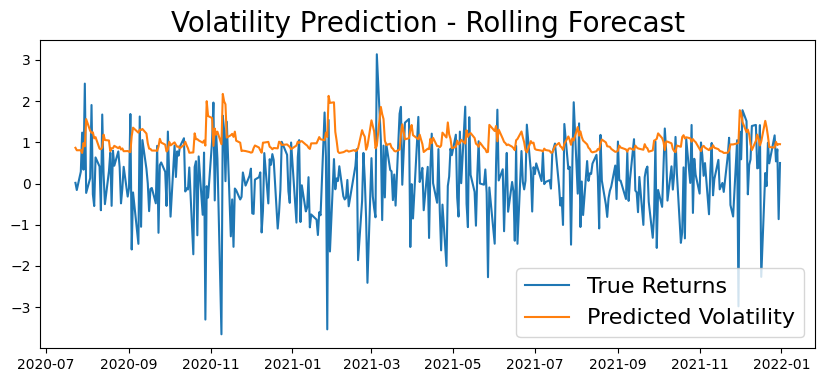

In [19]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

# S&P 500

In [20]:
start = datetime(2000, 1, 1)
end = datetime(2020, 6, 10)

In [23]:
#spy = web.DataReader('SPY', 'yahoo', start=start, end=end)
spy = yf.download('^GSPC', start = '2016-01-01' , end = '2022-01-01')
spy.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,2038.199951,2038.199951,1989.680054,2012.660034,2012.660034,4304880000
2016-01-05,2013.780029,2021.939941,2004.170044,2016.709961,2016.709961,3706620000
2016-01-06,2011.709961,2011.709961,1979.050049,1990.260010,1990.260010,4336660000
2016-01-07,1985.319946,1985.319946,1938.829956,1943.089966,1943.089966,5076590000
2016-01-08,1945.969971,1960.400024,1918.459961,1922.030029,1922.030029,4664940000


In [24]:
returns = 100 * spy.Close.pct_change().dropna()

Text(0.5, 1.0, 'SPY Returns')

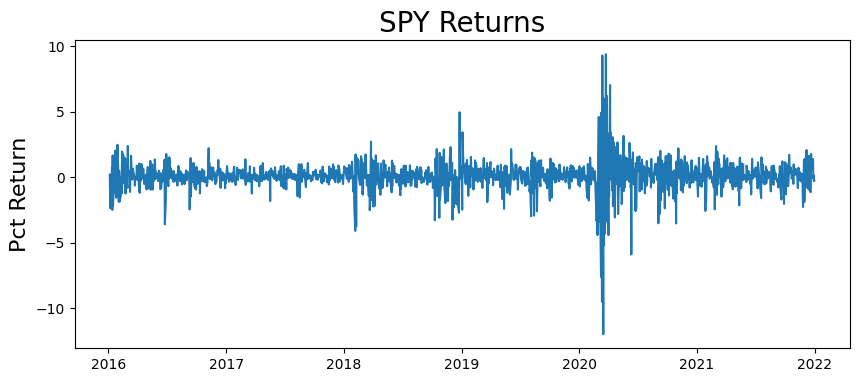

In [25]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Pct Return', fontsize=16)
plt.title('SPY Returns', fontsize=20)

## PACF

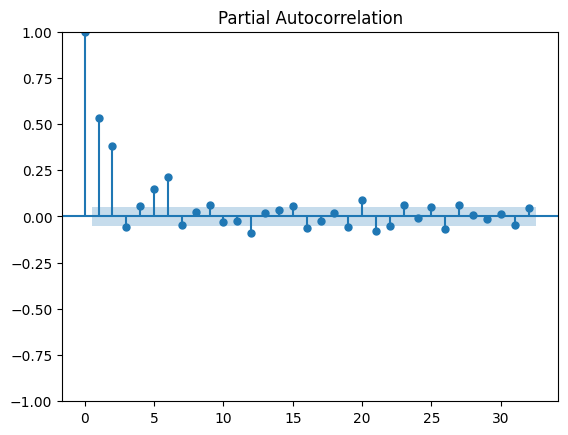

In [26]:
plot_pacf(returns**2)
plt.show()

## Fit GARCH(2,2)

In [27]:
model = arch_model(returns, p=2, q=2)

In [28]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 8667.853664665061
Iteration:      2,   Func. Count:     20,   Neg. LLF: 195128.7451975795
Iteration:      3,   Func. Count:     32,   Neg. LLF: 3542.450132095167
Iteration:      4,   Func. Count:     41,   Neg. LLF: 2445.1355630359867
Iteration:      5,   Func. Count:     49,   Neg. LLF: 2110.188579857704
Iteration:      6,   Func. Count:     58,   Neg. LLF: 1811.556521933999
Iteration:      7,   Func. Count:     66,   Neg. LLF: 1809.1922340617775
Iteration:      8,   Func. Count:     74,   Neg. LLF: 1808.72785046723
Iteration:      9,   Func. Count:     81,   Neg. LLF: 1808.7015776211945
Iteration:     10,   Func. Count:     88,   Neg. LLF: 1808.6954105098355
Iteration:     11,   Func. Count:     95,   Neg. LLF: 1808.6922997793235
Iteration:     12,   Func. Count:    102,   Neg. LLF: 1808.690226144107
Iteration:     13,   Func. Count:    109,   Neg. LLF: 1808.6892616155706
Iteration:     14,   Func. Count:    116,   Neg. LLF: 1808.

In [29]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1808.69
Distribution:                  Normal   AIC:                           3629.38
Method:            Maximum Likelihood   BIC:                           3661.30
                                        No. Observations:                 1510
Date:                Sun, Aug 04 2024   Df Residuals:                     1509
Time:                        20:11:48   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0942  1.719e-02      5.483  4.180e-08 [6.055e-02,  0.128]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0577  1.849e-02      3.120  1.808e-03 [2.145e-02,9.391e-02]
alpha[1]       0.2470  6.753e-02      3.659  2.537e-04     [  0.115,  0.379]
alpha[2]       0.0582  7.844e-02      0.742      0.458  [-9.555e-02,  0.212]
beta[1]        0.4460      0.185      2.409  1.598e-02   [8.317e-02,  0.809]
beta[2]        0.2038      0.130      1.572      0.116  [-5.037e-02,  0.458]
============================================================================

Covariance estimator: robust
"""

## Rolling Forecast

In [32]:
rolling_predictions = []
test_size = 365*5

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=2, q=2)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

ValueError: first_obs and last_obs produce in an empty array.

In [31]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-365*5:])

ValueError: Length of values (0) does not match length of index (1510)

In [ ]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365*5:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

# How to use the model

In [ ]:
train = returns
model = arch_model(train, p=2, q=2)
model_fit = model.fit(disp='off')

In [ ]:
pred = model_fit.forecast(horizon=7)
future_dates = [returns.index[-1] + timedelta(days=i) for i in range(1,8)]
pred = pd.Series(np.sqrt(pred.variance.values[-1,:]), index=future_dates)

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(pred)
plt.title('Volatility Prediction - Next 7 Days', fontsize=20)